# **My final capstone project**

## Introduction

#### ***About my project***:
 > As my final project, I chose to explore the restaurants in London.    
 > London is a city which interests me a lot, and I see this project as an opportunity to get to know the city, practice my programming skills,   
 > And, eventually, find insights out of the data.  
 > My wish is to be able to identify a business/social problems, and out of big data to suggest solutions.  
 > I see this project as my first self-experience in the enormous world of data science.  

#### ***Background discussion***:
 > London is the capital and the largest city of England and the UK.  
 > London is one of the preeminent financial centers of the world as the most important location for international finance.   
 > London is one of the leading tourist destinations in the world and in 2015 was ranked as the most visited city in the world with over 65 million visits
 > Therefore, tourism is one of London's prime industries
 >
 > **Details and facts:**
 >> * Revenue of UK restaurant industry 2017: 37.7 bn GDP
 >> * Consumers spending on food/catering service 2018: 92 bn GDP
 >> * Number of restaurants in the UK: 86.6k
 >> * The range for restaurant profit margin typically spans anywhere from 0 – 15 percent
 >> * Most of the restaurants fall between a 3 – 5 percent average restaurant profit margin.
 
 
 
 > _Due to the great amount of visitors, for both business and pleasure matters in London (which constitutes a high market share of the UK)  
 > and due to the high direct relation between the revenue of the UK restaurant industry, and the restaurants number in the UK,_  
 > _restaurants has a potential of being a beneficial business._
 >
 > _This project's main goal is to find the optimum location to open a restaurant, in order to set the restaurant at a higher range of the potential profit margin._

   #### ***Business problem***:
   - where should a business man open a new restaurant in London?
   

  > #### ***Finding solutions - about the data***:
  > - The initial dataset is the locations, boroughs and post town in London - out of wikipedia.
  > - Into this dataset we will add the coordinates - using Geopy library.
  > - Then, using Foursquare, we will explore the restaurants venues grouped by the unique locatios of the city of London.
   
  > _with this final datasets, of locations and venues, we will be able to know the diverse types of restaurants,  
  > their frequency in each location and to perform machine learning algorithms._
  > 
  > _Then, based on competition and demand,  
  > we could have a suggestion where is the best place to start a restaurant business in London._
   

#### ***To whom is that issue relevant?***   
- Entrepreneurs who aspire to open a new business 
- Customers who seek to have an affordable, well placed restaurants close to their home or office.
- Data scientist who seek to tell a story of the city's restaurants.

#### ***Methodology***   
> These are my steps exploring London's boroughs looking for a solution for the business problem:
>> 1. Receive, clean and arrange the data, finally becomes to a merged and large data frame
>> 2. Visualize London boroughs using Folium maps
>> 3. Examine the connection of housing price related to crimes to each borough - **Regression plots**
>> 4. Examine average house price per borough of the top 5 - **Bar chart**
>> 5. Examine median monthly private rent per borough of the top 5 - **Bar chart**
>> 6. Examine the ratio of crimes per population to each of the top 5 boroughs - **Bar chart**
>> 7. Visualize top 5 London boroughs using Folium maps
>> 8. Receive venues data to each borough
>> 9. Examine the number of venues per borough - **Bar chart**
>> 10. Examine the number of venues per borough - **Bar chart**
>> 11. Examine the population of each borough - **Pie chart**
>> 12. Examine the top 10 venues categories London's boroughs - **Bar chart**
>> 13. Examine the frequency of Italian restaurants per London's top 5 boroughs - **Bar chart**
>> 14. Create data frames of boroughs with most popular venues category, for both top 5 boroughs 
and all the boroughs
>> 15. Lunching a K-Means machine learning algorithm to cluster London's boroughs into cluster labels - **ML KMeans**
>> 16. Examine the number of boroughs per cluster label - **Pie chart**

>
>
>
>
>
>
>
>
### Step 1: importing libraries and receiving the data 

**Downloading necessary packages**

In [1]:
pip install lxml

     |████████████████████████████████| 5.8MB 5.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

     |████████████████████████████████| 921kB 27.4MB/s eta 0:00:01
     |████████████████████████████████| 1.5MB 32.1MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 33.7MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
%%capture
! pip install seaborn

In [4]:
! pip install geopy

     |████████████████████████████████| 102kB 16.4MB/s ta 0:00:01


**Importing necessary libraries**

In [77]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

from geopy.geocoders import Nominatim

import folium

import json

import requests

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from scipy import stats

from sklearn.cluster import KMeans

from sklearn import metrics

**Importing the data from wikipedia**

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
Coordinates = pd.read_html(url, header = 0)
Coordinates = Coordinates[0]
print (Coordinates.shape)
Coordinates.head()

(32, 10)


,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


**Functions that will help us to clean and arrange the data**

In [3]:
#function the replace the '&' in the Borough to 'and'
def set_boroughs (df):
    l = []
    for Borough in df['Borough']:
        
        new_borough = ''
        if '&' in Borough:
            new_borough = Borough
            new_borough = new_borough.replace('&', 'and')
            l.append(new_borough)
        else:
            l.append(Borough)

    new_series = pd.Series(l)
    df['Borough'] = new_series 

In [4]:
# a function who gets the df and returns the df without the brackets in the borough column.
def clean_digits (London):
    my_list = []
    for Borough in London['Borough']:
        if Borough[-1] == ']':
            new_borough = Borough
            while (not new_borough[-1] == '['):
                new_borough = new_borough[0:-1]
            new_borough = new_borough[0:-1]
            if not new_borough[-1].isalpha():
                 new_borough = new_borough[0:-1]
            my_list.append(new_borough)
        else:
            my_list.append(Borough)

    new_series = pd.Series(my_list)
    London['Borough'] = new_series     

In [5]:
#function that leaves only numbers in a df's column
def set_boroughs2 (df, column):
    l = []
    for Average in df[column]:
        new_average = ''
        if type (Average) == 'float':
            for i in Average.str:
                if i.isdigit():
                    new_average = new_average + i
            l.append(new_average)
            
        else:
            for i in Average:
                if i.isdigit():
                    new_average = new_average + i
            l.append(new_average)
            
    new_series = pd.Series(l)
    df[column] = new_series 

>
>
>
>
>
>
>
>
### Step 2: arranging and cleaning the data

In [6]:
#Getting only the relevant columns
Coordinates = Coordinates[['Borough', 'Area (sq mi)']]
#Making it numeric
Coordinates['Area (sq mi)'] = pd.to_numeric(Coordinates['Area (sq mi)'])
#Cleaning the borough's name
clean_digits (Coordinates)

#Getting accurate columns from Geocode

lat = []
long = []
long_series = pd.Series()
for Borough in Coordinates['Borough']: 
    locator = Nominatim(user_agent='myGeocoder')
    location = locator.geocode('{}, London, England'.format(Borough))
    lat.append(location.latitude)
    long.append(location.longitude)
    
lat_series = pd.Series(lat)
long_series = pd.Series(long)
Coordinates['Latitude'] = lat_series
Coordinates['Longitude'] = long_series
Coordinates

,Borough,Area (sq mi),Latitude,Longitude
0,Barking and Dagenham,13.93,51.554117,0.150504
1,Barnet,33.49,51.648784,-0.172913
2,Bexley,23.38,51.441679,0.150488
3,Brent,16.70,51.584778,-0.299180
4,Bromley,57.97,51.402805,0.014814
5,Camden,8.40,51.542305,-0.139560
6,Croydon,33.41,51.371305,-0.101957
7,Ealing,21.44,51.512655,-0.305195
8,Enfield,31.74,51.652085,-0.081018
9,Greenwich,18.28,51.482084,-0.004542


### Receiving more useful data about the boroughs

**Population**

In [7]:
Population = pd.read_csv(r'population in London boroughs 2018 final.csv')
Population.replace('City of Westminster', 'City', inplace = True)
#Beacause there is a missing data about the population of Westminster, I will add it manually, using wikipedia's data
Population = Population.append({'Borough' : 'Westminster' , 'Population' : 255324}, ignore_index = True)
Population['Population'] = pd.to_numeric(Population['Population'])
print ("The shape of the data:", Population.shape)
Population.head()

The shape of the data: (33, 2)


,Borough,Population
0,Barking and Dagenham,210711
1,Barnet,387803
2,Bexley,246124
3,Brent,329102
4,Bromley,329391


**Average house price**

In [8]:
Average_house_price = pd.read_csv(r'Average price in London per borough final.csv')
Average_house_price.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith & Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington & Chelsea,Kingston upon Thames,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Unnamed: 34,Inner London,Outer London,Unnamed: 37,NORTH EAST,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaN,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,E09000010,E09000011,E09000012,E09000013,E09000014,E09000015,E09000016,E09000017,E09000018,E09000019,E09000020,E09000021,E09000022,E09000023,E09000024,E09000025,E09000026,E09000027,E09000028,E09000029,E09000030,E09000031,E09000032,E09000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jan-95,91449.0,50460.2,93284.5,64958.1,71306.6,81671.5,120932.9,69158.2,79885.9,72514.7,62300.1,61296.5,124902.9,76287.6,84769.5,68000.1,73834.8,72231.7,92516.5,182694.8,80875.8,67771.0,60491.3,82070.6,53539.3,72189.6,109326.1,67885.2,71537.0,59865.2,61319.4,88559.0,133025.3,NaN,78252.0,72958.8,NaN,42076.4,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,Feb-95,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119508.9,68951.1,80897.1,73155.2,60993.3,63187.1,122087.7,78901.2,83396.1,69393.5,75031.1,71051.6,94342.4,182345.2,81230.1,65381.5,60869.3,79982.7,53153.9,72141.6,111103.0,64799.1,70893.2,62318.5,60252.1,88641.0,131468.3,NaN,75885.7,72937.9,NaN,42572.0,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715.0,54356.1,NaN,53096.2
3,Mar-95,79120.7,51269.0,92247.5,64367.5,72015.8,81449.3,120282.2,68712.4,81379.9,72190.4,61377.8,63593.3,120635.9,78521.9,83416.2,69368.0,74188.7,72098.0,93465.9,182878.8,81111.5,66336.5,60288.0,80661.7,53458.3,72501.4,107325.5,65763.3,70306.8,63938.7,60871.1,87124.8,132260.3,NaN,76591.6,72714.5,NaN,42369.7,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,Apr-95,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120097.9,68610.0,82188.9,71442.9,61927.7,65139.6,121424.6,79545.6,83567.9,69444.3,73911.4,71890.3,93344.5,184176.9,81672.8,66388.8,59471.0,79990.5,54479.8,72228.6,106875.0,63073.6,69411.9,66233.2,60971.4,87026.0,133370.2,NaN,76851.6,72591.9,NaN,42095.8,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786.0,NaN,53590.9


In [9]:
Average_house_price_2018 = Average_house_price.iloc[283]
Average_house_price_2018.drop(['Unnamed: 0'], inplace = True)
Average_house_price_2018.dropna(inplace = True)
Average_house_price_2018 = Average_house_price_2018.to_frame().reset_index()
Average_house_price_2018.columns = ['Borough', 'Average house price']
#chaniging boroughs names to the common name:
set_boroughs (Average_house_price_2018)
Average_house_price_2018['Average house price'] = pd.to_numeric(Average_house_price_2018['Average house price'])
print ("The shape of the data:", Average_house_price_2018.shape)
Average_house_price_2018.head()

The shape of the data: (45, 2)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:3917: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,Borough,Average house price
0,City of London,767848.2
1,Barking and Dagenham,297750.2
2,Barnet,526051.5
3,Bexley,349073.1
4,Brent,502408.6


#### _Crime level_

In [10]:
Crime_level = pd.read_csv(r'London Borough Level Crime.csv')
Crime_level.head()

,Borough,Major Category,Minor Category,201609,201610,201611,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808
0,Barking and Dagenham,Burglary,Burglary - Business and Community,45,41,24,19,25,47,44,32,29,19,42,30,25,23,27,21,38,33,38,36,24,33,30,19
1,Barking and Dagenham,Burglary,Burglary - Residential,49,60,73,100,118,124,93,101,129,71,96,83,81,122,88,124,143,134,122,75,93,80,93,84
2,Barking and Dagenham,Criminal Damage,Arson,15,3,1,5,5,5,2,13,6,14,2,5,8,7,7,4,2,3,6,3,4,12,6,5
3,Barking and Dagenham,Criminal Damage,Criminal Damage To M/V,61,68,67,59,65,62,61,61,71,59,66,77,72,63,48,57,60,51,53,64,64,66,69,43
4,Barking and Dagenham,Criminal Damage,Criminal Damage To Other Bldg,11,12,16,8,10,6,13,9,7,12,6,8,7,12,11,10,10,5,6,9,9,8,7,7


*Just a sneak peak on the categories of 'crime':*

In [11]:
Crime_level['Major Category'].value_counts()

Theft and Handling             264
Violence Against the Person    230
Criminal Damage                164
Drugs                           98
Sexual Offences                 66
Other Notifiable Offences       66
Burglary                        65
Robbery                         65
Fraud or Forgery                34
Name: Major Category, dtype: int64

In [12]:
Crime_level = Crime_level[['Borough', '201808']]
Crime_level = Crime_level.groupby('Borough').sum().reset_index()
Crime_level.columns = ['Borough', 'crimes']
Crime_level['crimes'] = pd.to_numeric(Crime_level['crimes'])
print ("The shape of the data:", Crime_level.shape)
Crime_level.head()

The shape of the data: (33, 2)


,Borough,crimes
0,Barking and Dagenham,1458
1,Barnet,2234
2,Bexley,1246
3,Brent,2483
4,Bromley,1844


#### _Rent price per borough_

In [13]:
Average_rent_price = pd.read_csv(r'house pricing in London 2014 final.csv')
Average_rent_price.head()

,Borough,Median monthly private rent,Unnamed: 2,Unnamed: 3
0,City of London,"1,928",NaN,NaN
1,Barking and Dagenham,950,NaN,NaN
2,Barnet,"1,300",NaN,NaN
3,Bexley,900,NaN,NaN
4,Brent,"1,350",NaN,NaN


In [14]:
Average_rent_price = Average_rent_price[['Borough', 'Median monthly private rent']]
Average_rent_price.dropna(inplace = True)
Average_rent_price['Median monthly private rent'] = Average_rent_price['Median monthly private rent'].str[1:]
set_boroughs2 (Average_rent_price, 'Median monthly private rent')
#chaniging boroughs names to the common name:

Average_rent_price.replace('Chelsea', 'Kensington and Chelsea', inplace = True)
Average_rent_price.replace('Fulham', 'Hammersmith and Fulham', inplace = True)
Average_rent_price['Median monthly private rent'] = pd.to_numeric(Average_rent_price['Median monthly private rent'])
print ("The shape of the data:", Average_rent_price.shape)
Average_rent_price.head()

The shape of the data: (35, 2)


,Borough,Median monthly private rent
0,City of London,1928
1,Barking and Dagenham,950
2,Barnet,1300
3,Bexley,900
4,Brent,1350


### Now let's merge all the data to one dataset!

In [15]:
London_boroughs_data = pd.merge(Crime_level, Coordinates, on='Borough')
London_boroughs_data.head()

,Borough,crimes,Area (sq mi),Latitude,Longitude
0,Barking and Dagenham,1458,13.93,51.554117,0.150504
1,Barnet,2234,33.49,51.648784,-0.172913
2,Bexley,1246,23.38,51.441679,0.150488
3,Brent,2483,16.70,51.584778,-0.299180
4,Bromley,1844,57.97,51.402805,0.014814


In [16]:
London_boroughs_data = London_boroughs_data.merge(Population, on = 'Borough')
London_boroughs_data = London_boroughs_data.merge(Average_house_price_2018, on = 'Borough')
London_boroughs_data = London_boroughs_data.merge(Average_rent_price, on = 'Borough')
London_boroughs_data = London_boroughs_data[['Borough', 'Area (sq mi)', 'Population', 'crimes', 'Average house price', 'Median monthly private rent', 'Latitude', 'Longitude' ]]
print ("the shape of the data:", London_boroughs_data.shape)
London_boroughs_data.head()

the shape of the data: (32, 8)


,Borough,Area (sq mi),Population,crimes,Average house price,Median monthly private rent,Latitude,Longitude
0,Barking and Dagenham,13.93,210711,1458,297750.2,950,51.554117,0.150504
1,Barnet,33.49,387803,2234,526051.5,1300,51.648784,-0.172913
2,Bexley,23.38,246124,1246,349073.1,900,51.441679,0.150488
3,Brent,16.70,329102,2483,502408.6,1350,51.584778,-0.299180
4,Bromley,57.97,329391,1844,442144.0,1100,51.402805,0.014814


#### Let's check that all the Boroughs are in!

In [17]:
Check1 = Coordinates['Borough'].to_frame()
Check2 = London_boroughs_data['Borough'].to_frame()

In [18]:
m = Check1.merge(Check2, on='Borough', how='outer', suffixes=['', '_'], indicator=True)

In [19]:
m

,Borough,_merge
0,Barking and Dagenham,both
1,Barnet,both
2,Bexley,both
3,Brent,both
4,Bromley,both
5,Camden,both
6,Croydon,both
7,Ealing,both
8,Enfield,both
9,Greenwich,both


### Noe we can start to analyze the data!

**The final dataset:**

In [20]:
London_boroughs_data

,Borough,Area (sq mi),Population,crimes,Average house price,Median monthly private rent,Latitude,Longitude
0,Barking and Dagenham,13.93,210711,1458,297750.2,950,51.554117,0.150504
1,Barnet,33.49,387803,2234,526051.5,1300,51.648784,-0.172913
2,Bexley,23.38,246124,1246,349073.1,900,51.441679,0.150488
3,Brent,16.70,329102,2483,502408.6,1350,51.584778,-0.299180
4,Bromley,57.97,329391,1844,442144.0,1100,51.402805,0.014814
5,Camden,8.40,253361,2845,810707.9,1842,51.542305,-0.139560
6,Croydon,33.41,384837,2553,372040.9,1000,51.371305,-0.101957
7,Ealing,21.44,342736,2268,468626.6,1300,51.512655,-0.305195
8,Enfield,31.74,332705,2267,398152.9,1175,51.652085,-0.081018
9,Greenwich,18.28,282849,2078,397654.4,1200,51.482084,-0.004542


**A map to visualize the boroughs**

In [21]:
address = 'London'
geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [22]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, borough in zip(London_boroughs_data['Latitude'], London_boroughs_data['Longitude'], London_boroughs_data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

### Becoming familiar with the data

**A linear connection between 'average house price' and 'crimes':**

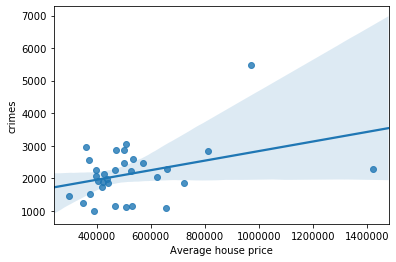

In [23]:
sns.regplot(x="Average house price", y="crimes", data=London_boroughs_data)

In [24]:
London_boroughs_data[["Median monthly private rent", "crimes"]].corr()

,Median monthly private rent,crimes
Median monthly private rent,1.000000,0.602334
crimes,0.602334,1.000000


In [25]:
pearson_coef, p_value = stats.pearsonr(London_boroughs_data['Median monthly private rent'], London_boroughs_data['crimes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.6023335872748822  with a P-value of P =   0.000264639028685399


**A linear connection between 'median monthly private rent' and 'crimes':**

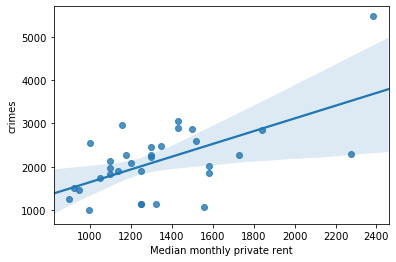

In [26]:
sns.regplot(x="Median monthly private rent", y="crimes", data=London_boroughs_data)

In [27]:
London_boroughs_data[["Average house price", "crimes"]].corr()

,Average house price,crimes
Average house price,1.000000,0.373082
crimes,0.373082,1.000000


In [28]:
pearson_coef, p_value = stats.pearsonr(London_boroughs_data['Average house price'], London_boroughs_data['crimes'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.3730824646911869  with a P-value of P =   0.035455748501986996


**Interesting insights from the above regression plots:**

> The results are very interesting and important.  
> In contrast with the common sense that the more the socio-economy level is higher, the crime level is lower,  
> we see that there is a positive connection between housing price and crime level.

#### _A sneak peak on top 5 boroughs for business_

 Islington, Hackney, Kensington and Chelsea, Lambeth, Hammersmith and Fulham are the most crowded 
 boroughs in London, in that exact order. Details from Google 

In [29]:
London_top5_boroughs_data = London_boroughs_data.take([17, 10, 18, 20, 11])

In [30]:
London_top5_boroughs_data

,Borough,Area (sq mi),Population,crimes,Average house price,Median monthly private rent,Latitude,Longitude
17,Islington,5.74,235000,2278,662017.2,1731,51.538429,-0.099905
10,Hackney,7.36,275929,2602,536278.5,1517,51.543240,-0.049362
18,Kensington and Chelsea,4.68,155741,2298,1423537.2,2275,51.498995,-0.199123
20,Lambeth,10.36,324048,2885,501954.1,1430,51.501301,-0.117287
11,Hammersmith and Fulham,6.33,182998,1862,721832.7,1582,51.492038,-0.223640


**Examine average house price per borough**

In [31]:
London_top5_boroughs_data_house_price = London_top5_boroughs_data[['Average house price']]
London_top5_boroughs_data_house_price.set_index(London_top5_boroughs_data['Borough'], inplace = True)
London_top5_boroughs_data_house_price

,Average house price
Borough,
Islington,662017.2
Hackney,536278.5
Kensington and Chelsea,1423537.2
Lambeth,501954.1
Hammersmith and Fulham,721832.7


Text(0.5, 1.0, 'Average house price per borough')

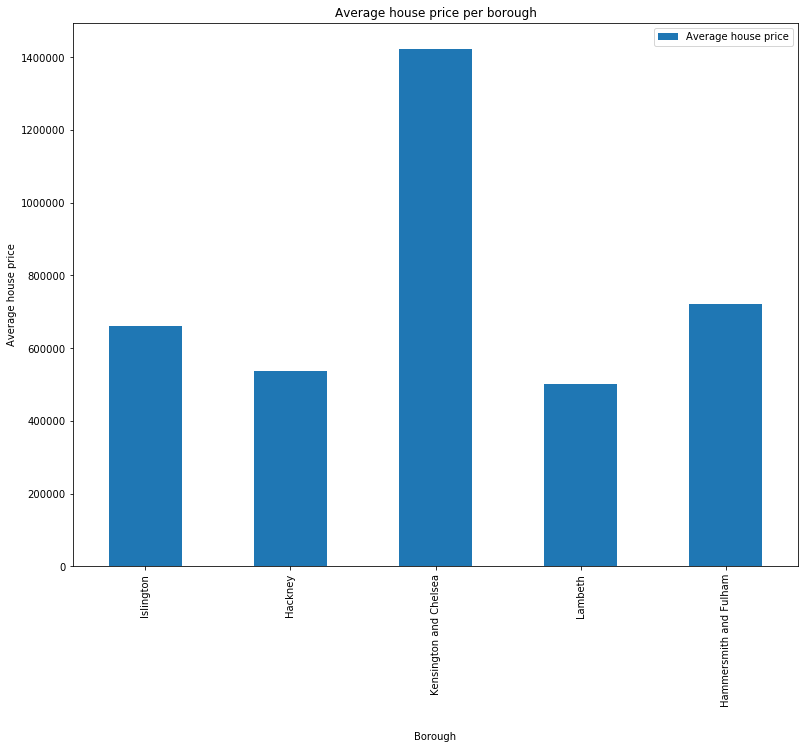

In [32]:
London_top5_boroughs_data_house_price.plot(kind='bar', figsize=(13, 10), rot=90) 

plt.xlabel('Borough', labelpad = 25)
plt.ylabel('Average house price')
plt.title('Average house price per borough')

**Examine median monthly private rent per borough**

In [33]:
London_top5_boroughs_data_median_rent_price = London_top5_boroughs_data[['Median monthly private rent']]
London_top5_boroughs_data_median_rent_price.set_index(London_top5_boroughs_data['Borough'], inplace = True)
London_top5_boroughs_data_median_rent_price

,Median monthly private rent
Borough,
Islington,1731
Hackney,1517
Kensington and Chelsea,2275
Lambeth,1430
Hammersmith and Fulham,1582


Text(0.5, 1.0, 'Median monthly private rent per borough')

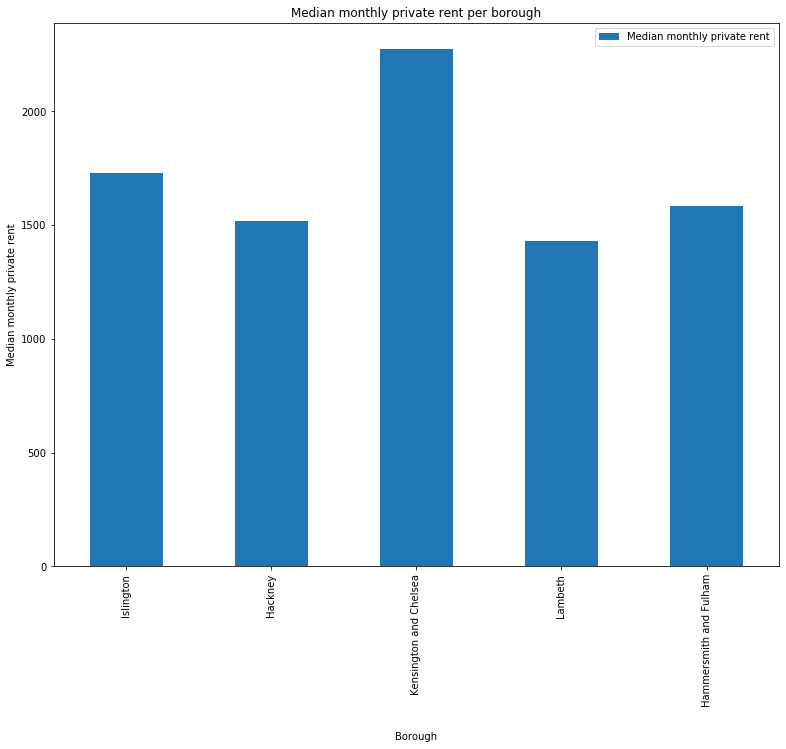

In [34]:
London_top5_boroughs_data_median_rent_price.plot(kind='bar', figsize=(13, 10), rot=90) 

plt.xlabel('Borough', labelpad = 25)
plt.ylabel('Median monthly private rent')
plt.title('Median monthly private rent per borough')

**Examine crimes per population ratio per borough**

In [35]:
crimes_to_population = London_top5_boroughs_data['crimes'] / London_top5_boroughs_data['Population']

In [36]:
crimes_to_population.to_frame()

,0
17,0.009694
10,0.009430
18,0.014755
20,0.008903
11,0.010175


In [37]:
crimes_to_population.index = ['Islington', 'Hackney', 'Kensington and Chelsea', \
                             'Lambeth', 'Hammersmith and Fulham']

In [38]:
crimes_to_population.columns = ['crimes per population']

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Number of crimes per population for each of the top 5 boroughs')

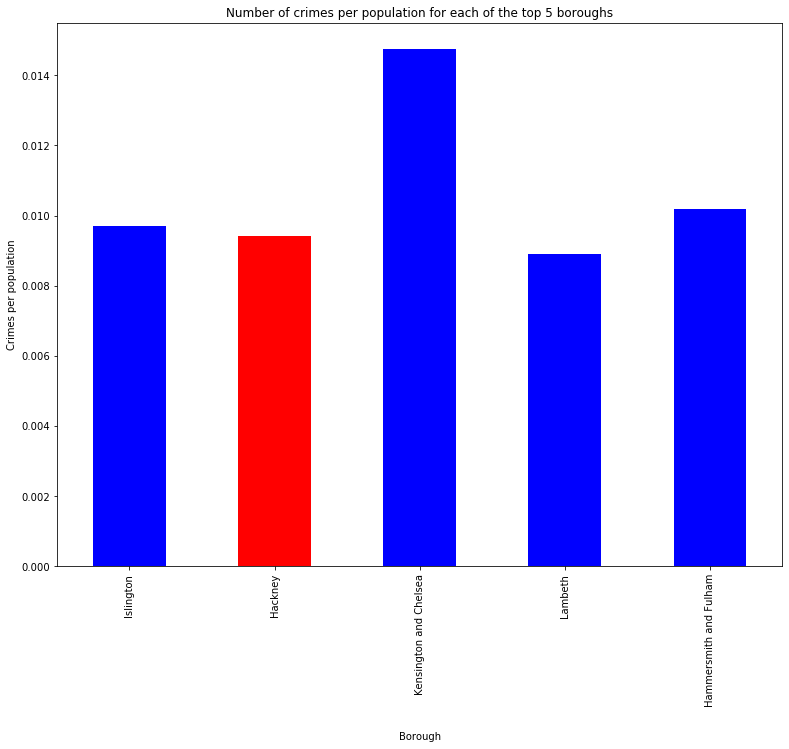

In [39]:
colors = []
for i in range(1,6):
    if i == 2:
        colors.append('r')
    else:
        colors.append('b')


crimes_to_population.plot(kind='bar', figsize=(13, 10), rot=90, colors = colors) 

plt.xlabel('Borough', labelpad = 25)
plt.ylabel('Crimes per population')
plt.title('Number of crimes per population for each of the top 5 boroughs')

**Before we continue, I would like to Hackney borough, which placed at the 4th place in the previous 3 examinations**

**Visualize the top 5 boroughs**

In [40]:
# create map of London using latitude and longitude values
map_london_top5 = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map
for lat, lng, borough in zip(London_top5_boroughs_data['Latitude'], London_top5_boroughs_data['Longitude'], London_top5_boroughs_data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#00ff00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_top5)  
    
map_london_top5

## _Looking at the boroughs venues:_

In [41]:
CLIENT_ID = 'MYBMYPGYN22ORPZJ3SS3STEFRWZT1XBBT0KRT1SIQZAUHLYI' 
CLIENT_SECRET = 'KLO35B2V5PZC5IDJC14HJQPY3VZV3ABBHXBCMHPVGPLLA5Q4' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MYBMYPGYN22ORPZJ3SS3STEFRWZT1XBBT0KRT1SIQZAUHLYI
CLIENT_SECRET:KLO35B2V5PZC5IDJC14HJQPY3VZV3ABBHXBCMHPVGPLLA5Q4


In [42]:
# A function that returns the venues dataset of a given location.

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Retrieving the venue's data to a dataframe:**

In [43]:
London_venues = getNearbyVenues(names=London_boroughs_data['Borough'],
                                   latitudes=London_boroughs_data['Latitude'],
                                   longitudes=London_boroughs_data['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


**The venues dataframe:**

In [44]:
print(London_venues.shape)
London_venues.head()

(1328, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551563,0.152761,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
4,Barking and Dagenham,51.554117,0.150504,Post office,51.551411,0.155003,Convenience Store


**How many venues were returned for each neighborhood**

In [46]:
Grouped_London_venues = London_venues.groupby('Borough').count()
Grouped_London_venues.head()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,6,6,6,6,6,6
Barnet,4,4,4,4,4,4
Bexley,12,12,12,12,12,12
Brent,6,6,6,6,6,6
Bromley,46,46,46,46,46,46


Text(0.5, 1.0, 'Number of venues per borough in all London (top crowded are colored)')

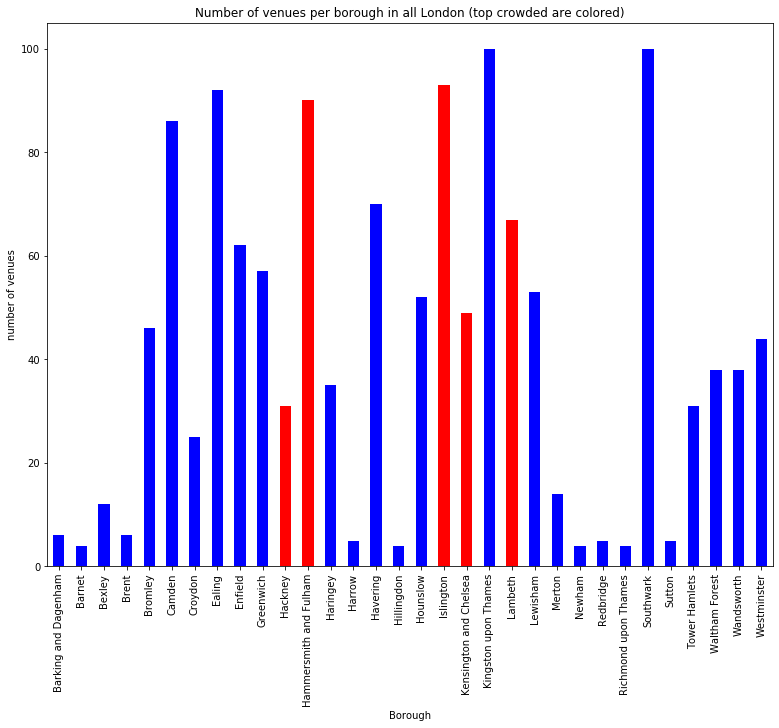

In [47]:
colors = ['b'] * 32
colors[17] = 'r'
colors[10] = 'r'
colors[18] = 'r'
colors[20] = 'r'
colors[11] = 'r'

Grouped_London_venues['Borough Latitude'].plot(kind='bar', figsize=(13, 10), rot=90, color =  colors) 

plt.xlabel('Borough')
plt.ylabel('number of venues')
plt.title('Number of venues per borough in all London (top crowded are colored)')

In [48]:
top_5_list = ['Islington', 'Hackney', 'Kensington and Chelsea', 'Lambeth', 'Hammersmith and Fulham']

In [49]:
Grouped_London_venues = Grouped_London_venues.loc[top_5_list]

In [50]:
Grouped_London_venues

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Islington,93,93,93,93,93,93
Hackney,31,31,31,31,31,31
Kensington and Chelsea,49,49,49,49,49,49
Lambeth,67,67,67,67,67,67
Hammersmith and Fulham,90,90,90,90,90,90


Text(0.5, 1.0, 'Number of venues at the top 5 venues')

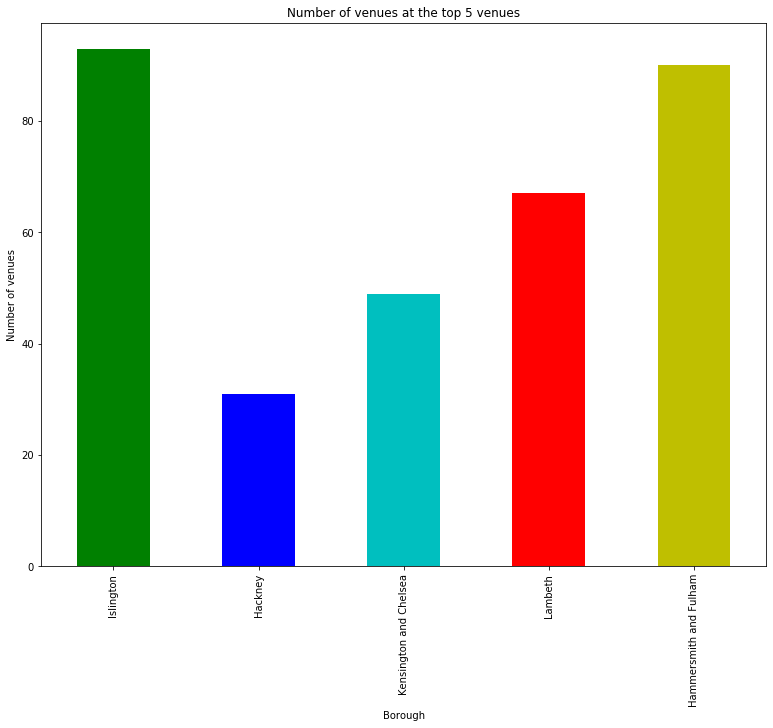

In [51]:
color = ['g', 'b', 'c', 'r', 'y']
Grouped_London_venues['Venue'].plot(kind='bar', figsize=(13, 10), rot=90, color = color) 

plt.xlabel('Borough')
plt.ylabel('Number of venues')
plt.title('Number of venues at the top 5 venues')

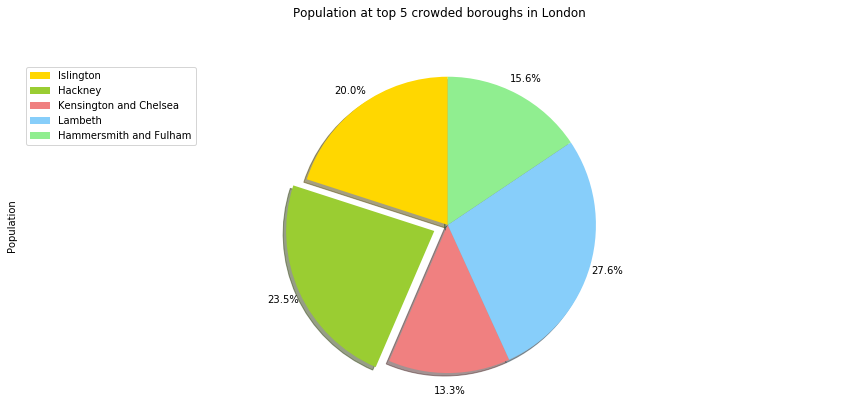

In [52]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

London_top5_boroughs_data['Population'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Population at top 5 crowded boroughs in London', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=London_top5_boroughs_data.Borough, loc='upper left') 

plt.show()

**Finding the top 10 venues categories in London**

Print how many unique categories there are

In [53]:
print('There are {} uniques categories.'.format(len(London_venues['Venue Category'].unique())))

There are 225 uniques categories.


In [54]:
London_top10_venues = London_venues.groupby('Venue Category').count().nlargest(10, 'Borough')
London_top10_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Pub,94,94,94,94,94,94
Coffee Shop,89,89,89,89,89,89
Café,58,58,58,58,58,58
Clothing Store,44,44,44,44,44,44
Hotel,38,38,38,38,38,38
Italian Restaurant,32,32,32,32,32,32
Gym / Fitness Center,30,30,30,30,30,30
Sandwich Place,29,29,29,29,29,29
Burger Joint,27,27,27,27,27,27


Text(0.5, 1.0, 'Number of occurrences  per venue in all London')

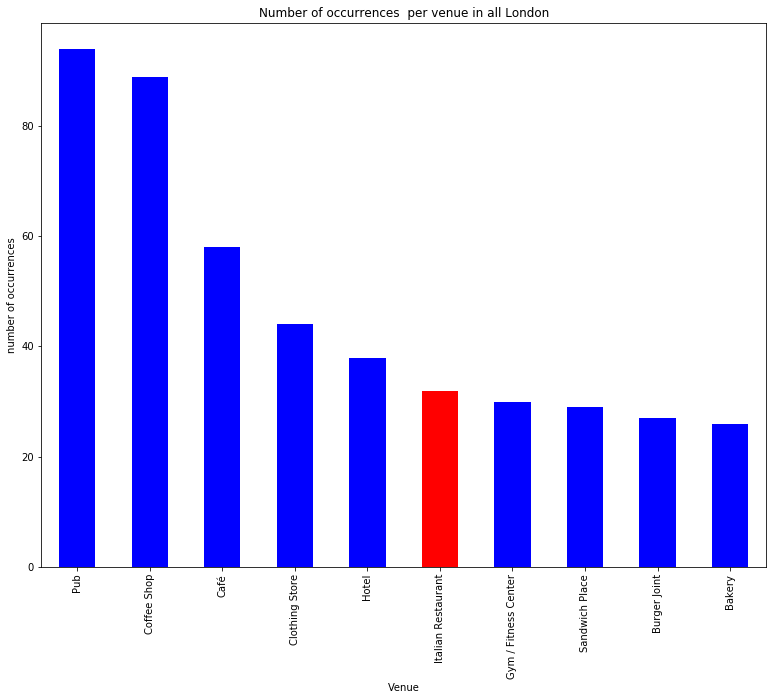

In [55]:
colors = []
for i in range(0,10):
    if i == 5:
        colors.append('r')
    else:
        colors.append('b')
    

London_top10_venues['Borough'].plot(kind='bar', figsize=(13, 10), rot=90, colors = colors) 

plt.xlabel('Venue')
plt.ylabel('number of occurrences')
plt.title('Number of occurrences  per venue in all London')

### Let's analyze each borough of our top 5

In [56]:
# one hot encoding
London_onehot = pd.get_dummies(London_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
London_onehot['Borough'] = London_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [London_onehot.columns[-1]] + list(London_onehot.columns[:-1])
London_onehot = London_onehot[fixed_columns]

London_onehot.head()

,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Candy Store,Caribbean Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Public Bathroom,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Romanian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [57]:
London_grouped = London_onehot.groupby('Borough').mean().reset_index()
print (London_grouped.shape)
London_grouped.head()

(32, 226)


,Borough,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Candy Store,Caribbean Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Public Bathroom,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Romanian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [58]:
London_grouped_top5 = London_grouped.take([17, 10, 18, 20, 11])

In [59]:
London_grouped_top5.reset_index(inplace = True, drop = True)

In [60]:
London_grouped_top5.set_index(['Borough'], inplace = True)

Text(0.5, 1.0, 'Frequency of Italian Restaurants in the top 5 boroughs')

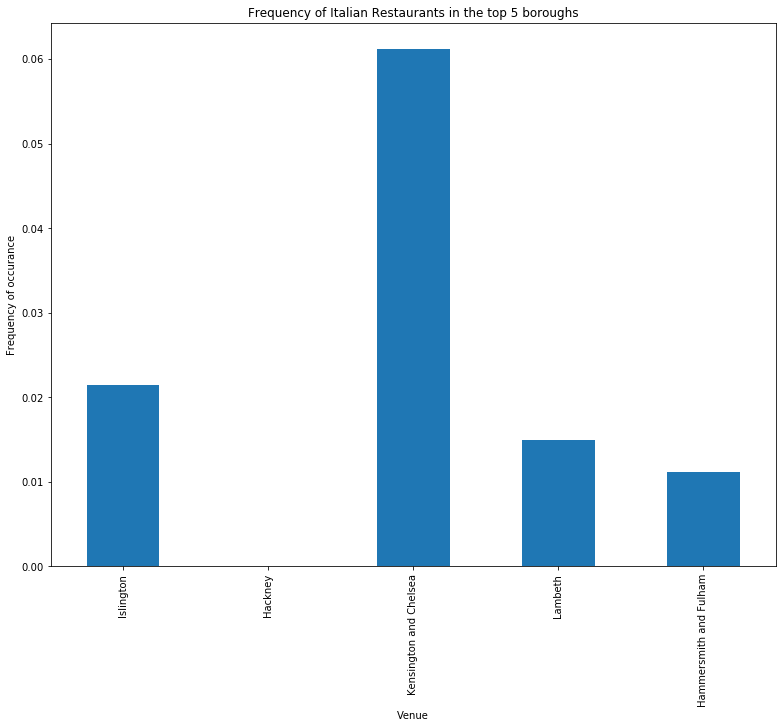

In [61]:
London_grouped_top5['Italian Restaurant'].plot(kind='bar', figsize=(13, 10), rot=90) 

plt.xlabel('Venue')
plt.ylabel('Frequency of occurance')
plt.title('Frequency of Italian Restaurants in the top 5 boroughs')

In [62]:
num_top_venues = 5
London_grouped_top5 = London_grouped.take([17, 10, 18, 20, 11])

for borough in London_grouped_top5['Borough']:
    print("----"+borough+"----")
    temp = London_grouped_top5[London_grouped_top5['Borough'] == borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Islington----
                      venue  freq
0                       Pub  0.09
1  Mediterranean Restaurant  0.05
2         French Restaurant  0.04
3                    Bakery  0.03
4              Burger Joint  0.03


----Hackney----
                   venue  freq
0            Coffee Shop  0.16
1                    Pub  0.10
2  Vietnamese Restaurant  0.06
3                    Bar  0.06
4                   Café  0.06


----Kensington and Chelsea----
                        venue  freq
0                        Café  0.12
1          Italian Restaurant  0.06
2                Burger Joint  0.04
3                 Supermarket  0.04
4  Modern European Restaurant  0.04


----Lambeth----
            venue  freq
0           Hotel  0.09
1     Coffee Shop  0.07
2             Bar  0.07
3  Sandwich Place  0.04
4     Event Space  0.03


----Hammersmith and Fulham----
            venue  freq
0             Pub  0.09
1     Coffee Shop  0.08
2            Café  0.07
3           Hotel  0.06
4  Sandwic

**We can see that coffee shop is the most frequent venue in Hackney**

In [63]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [64]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted_top5 = pd.DataFrame(columns=columns)
boroughs_venues_sorted_top5['Borough'] = London_grouped_top5['Borough']

for ind in np.arange(London_grouped_top5.shape[0]):
    boroughs_venues_sorted_top5.iloc[ind, 1:] = return_most_common_venues(London_grouped_top5.iloc[ind, :], num_top_venues)

boroughs_venues_sorted_top5.reset_index(inplace = True, drop = True)
print ("The shape of the dataset:", boroughs_venues_sorted_top5.shape)
boroughs_venues_sorted_top5.head()

The shape of the dataset: (5, 11)


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Islington,Pub,Mediterranean Restaurant,French Restaurant,Gastropub,Bakery,Burger Joint,Coffee Shop,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
1,Hackney,Coffee Shop,Pub,Café,Bar,Vietnamese Restaurant,Restaurant,Flea Market,Movie Theater,Brewery,Sporting Goods Shop
2,Kensington and Chelsea,Café,Italian Restaurant,Breakfast Spot,Supermarket,Cupcake Shop,Pub,Modern European Restaurant,Burger Joint,History Museum,English Restaurant
3,Lambeth,Hotel,Coffee Shop,Bar,Sandwich Place,Movie Theater,Café,Event Space,Beer Bar,Bakery,Korean Restaurant
4,Hammersmith and Fulham,Pub,Coffee Shop,Café,Hotel,Sandwich Place,Gym / Fitness Center,Indian Restaurant,Grocery Store,Fast Food Restaurant,Cocktail Bar


In [65]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = London_grouped['Borough']

for ind in np.arange(London_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(London_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.reset_index(inplace = True, drop = True)
print ("The shape of the dataset:", boroughs_venues_sorted.shape)
boroughs_venues_sorted.head()

The shape of the dataset: (32, 11)


,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Bus Stop,Convenience Store,Fishing Store,Grocery Store,Liquor Store,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop
1,Barnet,Pub,Gym / Fitness Center,Train Station,Food Truck,Food & Drink Shop,Food,Flea Market,Fishing Store,Fish Market,Fish & Chips Shop
2,Bexley,Pub,Indian Restaurant,Greek Restaurant,Fast Food Restaurant,Bar,Toy / Game Store,Train Station,Supermarket,Chinese Restaurant,Italian Restaurant
3,Brent,Indian Restaurant,Park,Gym / Fitness Center,Gym,Fast Food Restaurant,Pub,Argentinian Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant
4,Bromley,Coffee Shop,Clothing Store,Pub,Gym / Fitness Center,Burger Joint,Pizza Place,Women's Store,Sandwich Place,Stationery Store,Furniture / Home Store


In [66]:
London_grouped_clustering = London_grouped.drop('Borough', 1)

In [67]:
print (London_grouped_clustering.shape)
London_grouped_clustering.head()

(32, 225)


,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beach,Beer Bar,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Bulgarian Restaurant,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Canal,Candy Store,Caribbean Restaurant,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pie Shop,Pier,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Public Art,Public Bathroom,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Road,Rock Club,Romanian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Train Station,Tram Station,Tree,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [68]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(London_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 4, 4, 1, 1, 1, 1, 1, 1], dtype=int32)

In [69]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

London_merged = London_boroughs_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
London_merged = London_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

London_merged.head() # check the last columns!

,Borough,Area (sq mi),Population,crimes,Average house price,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,13.93,210711,1458,297750.2,950,51.554117,0.150504,0,Bus Stop,Convenience Store,Fishing Store,Grocery Store,Liquor Store,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop
1,Barnet,33.49,387803,2234,526051.5,1300,51.648784,-0.172913,2,Pub,Gym / Fitness Center,Train Station,Food Truck,Food & Drink Shop,Food,Flea Market,Fishing Store,Fish Market,Fish & Chips Shop
2,Bexley,23.38,246124,1246,349073.1,900,51.441679,0.150488,4,Pub,Indian Restaurant,Greek Restaurant,Fast Food Restaurant,Bar,Toy / Game Store,Train Station,Supermarket,Chinese Restaurant,Italian Restaurant
3,Brent,16.70,329102,2483,502408.6,1350,51.584778,-0.299180,4,Indian Restaurant,Park,Gym / Fitness Center,Gym,Fast Food Restaurant,Pub,Argentinian Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant
4,Bromley,57.97,329391,1844,442144.0,1100,51.402805,0.014814,1,Coffee Shop,Clothing Store,Pub,Gym / Fitness Center,Burger Joint,Pizza Place,Women's Store,Sandwich Place,Stationery Store,Furniture / Home Store


In [87]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(London_merged['Latitude'], London_merged['Longitude'], London_merged['Borough'], London_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [79]:
London_merged.head()

,Borough,Area (sq mi),Population,crimes,Average house price,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,13.93,210711,1458,297750.2,950,51.554117,0.150504,0,Bus Stop,Convenience Store,Fishing Store,Grocery Store,Liquor Store,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop
1,Barnet,33.49,387803,2234,526051.5,1300,51.648784,-0.172913,2,Pub,Gym / Fitness Center,Train Station,Food Truck,Food & Drink Shop,Food,Flea Market,Fishing Store,Fish Market,Fish & Chips Shop
2,Bexley,23.38,246124,1246,349073.1,900,51.441679,0.150488,4,Pub,Indian Restaurant,Greek Restaurant,Fast Food Restaurant,Bar,Toy / Game Store,Train Station,Supermarket,Chinese Restaurant,Italian Restaurant
3,Brent,16.70,329102,2483,502408.6,1350,51.584778,-0.299180,4,Indian Restaurant,Park,Gym / Fitness Center,Gym,Fast Food Restaurant,Pub,Argentinian Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant
4,Bromley,57.97,329391,1844,442144.0,1100,51.402805,0.014814,1,Coffee Shop,Clothing Store,Pub,Gym / Fitness Center,Burger Joint,Pizza Place,Women's Store,Sandwich Place,Stationery Store,Furniture / Home Store


### Examining the clusters that were created

**Cluster 0**

In [80]:
London_merged.loc[London_merged['Cluster Labels'] == 0, London_merged.columns[[0] + list(range(5, London_merged.shape[1]))]]

,Borough,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,950,51.554117,0.150504,0,Bus Stop,Convenience Store,Fishing Store,Grocery Store,Liquor Store,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop


**Cluster 1**

In [81]:
London_merged.loc[London_merged['Cluster Labels'] == 1, London_merged.columns[[0] + list(range(5, London_merged.shape[1]))]]

,Borough,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bromley,1100,51.402805,0.014814,1,Coffee Shop,Clothing Store,Pub,Gym / Fitness Center,Burger Joint,Pizza Place,Women's Store,Sandwich Place,Stationery Store,Furniture / Home Store
5,Camden,1842,51.542305,-0.139560,1,Pub,Coffee Shop,Burger Joint,Italian Restaurant,Ice Cream Shop,Vegetarian / Vegan Restaurant,Café,Market,Bar,Supermarket
6,Croydon,1000,51.371305,-0.101957,1,Pub,Coffee Shop,Indian Restaurant,Malay Restaurant,Portuguese Restaurant,Clothing Store,Nightclub,Caribbean Restaurant,Café,Burger Joint
7,Ealing,1300,51.512655,-0.305195,1,Coffee Shop,Pub,Clothing Store,Grocery Store,Park,Burger Joint,Platform,Bakery,Italian Restaurant,Gym / Fitness Center
8,Enfield,1175,51.652085,-0.081018,1,Clothing Store,Coffee Shop,Café,Mobile Phone Shop,Pharmacy,Sandwich Place,Supermarket,Optical Shop,Department Store,Pub
9,Greenwich,1200,51.482084,-0.004542,1,Boat or Ferry,Pub,Burger Joint,Bakery,Pier,Market,Garden,Bar,Italian Restaurant,History Museum
10,Hackney,1517,51.543240,-0.049362,1,Coffee Shop,Pub,Café,Bar,Vietnamese Restaurant,Restaurant,Flea Market,Movie Theater,Brewery,Sporting Goods Shop
11,Hammersmith and Fulham,1582,51.492038,-0.223640,1,Pub,Coffee Shop,Café,Hotel,Sandwich Place,Gym / Fitness Center,Indian Restaurant,Grocery Store,Fast Food Restaurant,Cocktail Bar
12,Haringey,1300,51.587930,-0.105410,1,Coffee Shop,Bus Stop,Indian Restaurant,Café,Fast Food Restaurant,Park,Hookah Bar,Polish Restaurant,Cosmetics Shop,Pub
13,Harrow,1250,51.596769,-0.337275,1,Indian Restaurant,Convenience Store,Coffee Shop,Home Service,Sandwich Place,Dim Sum Restaurant,Diner,Food Truck,Food & Drink Shop,Food


**Cluster 2**

In [82]:
London_merged.loc[London_merged['Cluster Labels'] == 2, London_merged.columns[[0] + list(range(5, London_merged.shape[1]))]]

,Borough,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,1300,51.648784,-0.172913,2,Pub,Gym / Fitness Center,Train Station,Food Truck,Food & Drink Shop,Food,Flea Market,Fishing Store,Fish Market,Fish & Chips Shop


**Cluster 3**

In [83]:
London_merged.loc[London_merged['Cluster Labels'] == 3, London_merged.columns[[0] + list(range(5, London_merged.shape[1]))]]

,Borough,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Richmond upon Thames,1556,51.440354,-0.308151,3,Bus Station,Garden Center,German Restaurant,Trail,Yoga Studio,Fast Food Restaurant,French Restaurant,Food Truck,Food & Drink Shop,Food


**Cluster 4**

In [84]:
London_merged.loc[London_merged['Cluster Labels'] == 4, London_merged.columns[[0] + list(range(5, London_merged.shape[1]))]]

,Borough,Median monthly private rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,900,51.441679,0.150488,4,Pub,Indian Restaurant,Greek Restaurant,Fast Food Restaurant,Bar,Toy / Game Store,Train Station,Supermarket,Chinese Restaurant,Italian Restaurant
3,Brent,1350,51.584778,-0.299180,4,Indian Restaurant,Park,Gym / Fitness Center,Gym,Fast Food Restaurant,Pub,Argentinian Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant
15,Hillingdon,1138,51.542519,-0.448335,4,Pub,Park,Fast Food Restaurant,Chinese Restaurant,Dessert Shop,Dim Sum Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market
22,Merton,1325,51.410803,-0.188099,4,Tram Station,Pub,Cricket Ground,Hardware Store,Thai Restaurant,Park,Sushi Restaurant,Farm,Flea Market,Brazilian Restaurant
23,Newham,1160,51.530000,0.029318,4,Café,Pub,Fast Food Restaurant,Frozen Yogurt Shop,French Restaurant,Food Truck,Food & Drink Shop,Food,Flea Market,Fishing Store
24,Redbridge,1050,51.576320,0.045410,4,Pub,Hotel,Pizza Place,Metro Station,Eastern European Restaurant,Farm,Food Truck,Food & Drink Shop,Food,Flea Market


In [85]:
London_grouped_by_labels = London_merged.groupby('Cluster Labels').count()

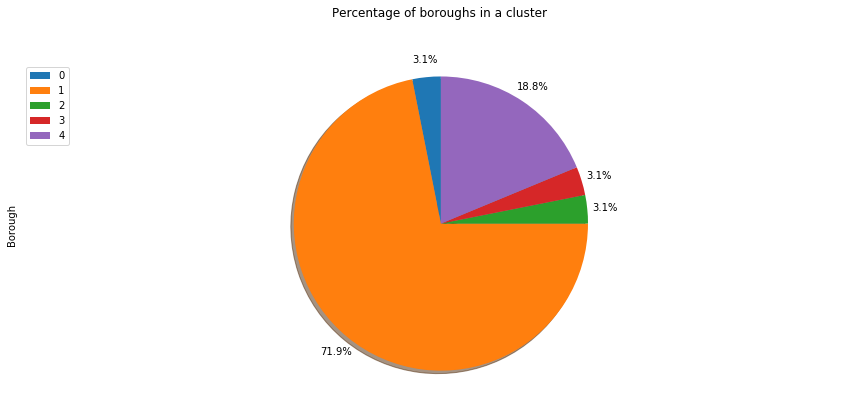

In [86]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
#explode_list = [0, 0.1, 0, 0, 0] # ratio for each continent with which to offset each wedge.

London_grouped_by_labels['Borough'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    
                            )

# scale the title up by 12% to match pctdistance
plt.title('Percentage of boroughs in a cluster', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=London_grouped_by_labels.index, loc='upper left') 

plt.show()

 ### ***Results section***
 
 As shown above, I focused a lot at the top 5 most crowded boroughs in London
 
 >#### ***Borough of Hackney***:
   >> - 4th place out of the top 5 boroughs in crimes per population ratio
   >> - 4th place out of the top 5 boroughs in housing price
   >> - 4th place out of the top 5 boroughs in median monthly private rent per borough
   >> - 5th place out of the top 5 boroughs in number of venues
   >> - 2nd place out of the top 5 boroughs in number of population
   >> - coffee shop, pub, Vietnamese restaurant, bar, cafe - are the top 5 most frequent venues categories in the borough of Hackney
   >> - Hackney does not have Italian restaurants at all, comparing to the other top 5 boroughs which do have.
   
> #### ***Other checked details***:
   >> - Italian restaurant is the 6th most common venue category in all London.
   >> - ML Kmeans algorithm clustered the boroughs into 5 clusters

 

 ### ***Conclusion and discussion section***
 
> Based on the results and examinations, we can clearly see that while Hackney is one of the top 5 boroughs in London, it has both low house pricing and crime ratio. Furthermore, it is the second most populated borough out of the top most crowded boroughs in London.

> In addition, we can understand that Italian restaurant category is very common in all London, while there is not even a single one in the borough of Hackney.

> In conclusion, first I will recommend on opening an Italian restaurant in the borough of Hackney. Moreover, we can see very interesting details such as crimes, prices, venues type etc. that can be taken for further examinations and analysis.



 ### ***Acknowledgments***
 
 >#### ***Data sets***:
   >> - A wiki datasets of the neighbourhoods of London
   >> - Geopy library
   >> - Foursquare
   >> - Datasets of crimes and prices from London city site
   
   
   
   
> #### ***References***:
   >> - statista.com
   >> - Medium forum - toward data science
   >> - London's wikipedia page
   >> - Toast site 
   >> - Google
 

**Hope you find this notebook as helpful and meaningful!**

**GUY**